<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap01/1_1_BackgroundMathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Notebook 1.1 -- Background Mathematics**

The purpose of this Python notebook is to make sure you can use CoLab and to familiarize yourself with some of the background mathematical concepts that you are going to need to understand deep learning. <br><br> It's not meant to be difficult and it may be that you know some or all of this information already.<br><br> Math is *NOT* a spectator sport.  You won't learn it by just listening to lectures or reading books.  It really helps to interact with it and explore yourself. <br><br> Work through the cells below, running each cell in turn.  In various places you will see the words **"TODO"**. Follow the instructions at these places and write code to complete the functions.  There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

**Linear functions**<br> We will be using the term *linear equation* to mean a weighted sum of inputs plus an offset. If there is just one input $x$, then this is a straight line:

\begin{equation}y=\beta+\omega x,\end{equation}

where $\beta$ is the y-intercept of the linear and $\omega$ is the slope of the line. When there are two inputs $x_{1}$ and $x_{2}$, then this becomes:

\begin{equation}y=\beta+\omega_1 x_1 + \omega_2 x_2.\end{equation}

Any other functions are by definition **non-linear**.




In [17]:
# Define a linear function with just one input, x
# β (intercept) aka beta below: where the line crosses the y-axis
# ω (slope) aka omega below: how steep the line is
def linear_function_1D(x,beta,omega):
  # TODO -- replace the code line below with formula for 1D linear equation
  y = beta + omega * x
  return y

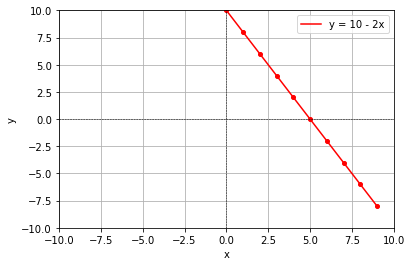

In [55]:
# Plot the 1D linear function

# Define an array of x values from 0 to 10 with increments of 0.01
x = np.arange(0,10, 1) 
# Compute y using the function you filled in above
beta = 10; omega = -2

y = linear_function_1D(x,beta,omega)

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-', label='y = 10 - 2x')
ax.plot(x, y, 'ro', markersize=4)
ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(0, color='black', linestyle='--', linewidth=0.5)
ax.legend()
plt.grid(True)
plt.show()

# TODO -- experiment with changing the values of beta and omega
# to understand what they do.  Try to make a line
# that crosses the y-axis at y=10 and the x-axis at x=5

Now let's investigate a 2D linear function

In [ ]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(x1_mesh, x2_mesh, y):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,7)
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')
    plt.show()

In [ ]:
# Define a linear function with two inputs, x1 and x2
def linear_function_2D(x1,x2,beta,omega1,omega2):
  y = beta + omega1 * x1 + omega2 * x2
  return y

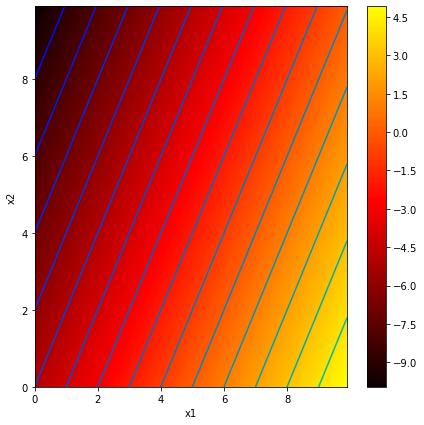

In [65]:
# Plot the 2D function

# Make 2D array of x and y points
x1 = np.arange(0.0, 10.0, 0.1) # 1D array of values jumping in increments of 1 for the weight of the first variable
x2 = np.arange(0.0, 10.0, 0.1) 
x1,x2 = np.meshgrid(x1,x2)  # Becomes a 2D array where each row is a copy of the original x1 # Readings: https://www.geeksforgeeks.org/numpy-meshgrid-function/

'''
BTW why would you evaluate a function over a grid? 
Answer:
Ability to visualise 3rd dimension. Imagine x1 is latitude, x2 is longitude and y is the elevation...

'''

# 

# Compute the 2D function for given values of omega1, omega2
beta = -5; omega1 = 1.0; omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)

# Draw the function.
# Color represents y value (brighter = higher value)
# Black = -10 or less, White = +10 or more
# 0 = mid orange
# Lines are contours where value is equal
draw_2D_function(x1,x2,y)

# TODO
# Predict what this plot will look like if you set omega_1 to zero
# omega_1 would not matter and could even potentially be dropped as a third dimension is not necessary
# Straight horizontal lines will appear in the graph below

# TODO
# Predict what this plot will look like if you set omega_2 to zero
# omega_2 would not matter and could even potentially be dropped as a third dimension is not necessary
# Straight vertical lines will appear in the graph below

# TODO
# Predict what this plot will look like if you set beta to -5
# Contour lines will stay the same direction/shape all y values decrease by 5


Often we will want to compute many linear functions at the same time.  For example, we might have three inputs, $x_1$, $x_2$, and $x_3$ and want to compute two linear functions giving $y_1$ and $y_2$. Of course, we could do this by just running each equation separately,<br><br>

\begin{align}y_1 &=& \beta_1 + \omega_{11} x_1 + \omega_{12} x_2 + \omega_{13} x_3\\
y_2 &=& \beta_2 + \omega_{21} x_1 + \omega_{22} x_2 + \omega_{23} x_3.
\end{align}

However, we can write it more compactly with vectors and matrices:

\begin{equation}
\begin{bmatrix} y_1\\ y_2 \end{bmatrix} = \begin{bmatrix}\beta_{1}\\\beta_{2}\end{bmatrix}+ \begin{bmatrix}\omega_{11}&\omega_{12}&\omega_{13}\\\omega_{21}&\omega_{22}&\omega_{23}\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\\x_{3}\end{bmatrix},
\end{equation}
or

\begin{equation}
\mathbf{y} = \boldsymbol\beta +\boldsymbol\Omega\mathbf{x}.
\end{equation}

for short.  Here, lowercase bold symbols are used for vectors.  Upper case bold symbols are used for matrices.



In [57]:
# Define a linear function with three inputs, x1, x2, and x_3
def linear_function_3D(x1,x2,x3,beta,omega1,omega2,omega3):
  # TODO -- replace the code below with formula for a single 3D linear equation
  y = beta + x1 * omega1 + x2 * omega2 + x3 * omega3
  return y

Let's compute two linear equations, using both the individual equations and the vector / matrix form and check they give the same result

In [ ]:
# Define the parameters
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2

# Define the inputs
x1 = 4 ; x2 =-1; x3 = 2

# Compute using the individual equations
y1 = linear_function_3D(x1,x2,x3,beta1,omega11,omega12,omega13)
y2 = linear_function_3D(x1,x2,x3,beta2,omega21,omega22,omega23)
print("Individual equations")
print('y1 = %3.3f\ny2 = %3.3f'%((y1,y2)))

# Define vectors and matrices
beta_vec = np.array([[beta1],[beta2]])
omega_mat = np.array([[omega11,omega12,omega13],
                      [omega21,omega22,omega23]])
x_vec = np.array([[x1], [x2], [x3]])

# Compute with vector/matrix form
y_vec = beta_vec+np.matmul(omega_mat, x_vec) # matmul completes matrix multiplication...

print("Matrix/vector form")
print('y1= %3.3f\ny2 = %3.3f'%((y_vec[0][0],y_vec[1][0])))


Individual equations
y1 = -4.500
y2 = 2.900
Matrix/vector form
y1= -4.500
y2 = 2.900


# Questions

1.  A single linear equation with three inputs (i.e. **linear_function_3D()**) associates a value y with each point in a 3D space ($x_1$,$x_2$,$x_3$).  Is it possible to visualize this?   What value is at position (0,0,0)?

2.  Write code to compute three linear equations with two inputs ($x_1$, $x_2$) using both the individual equations and the matrix form (you can make up any values for the inputs $\beta_{i}$ and the slopes $\omega_{ij}$.

# Special functions

Throughout the book, we'll be using some special functions (see Appendix B.1.3).  The most important of these are the logarithm and exponential functions.  Let's investigate their properties.

We'll start with the exponential function $y=\exp[x]=e^x$ which maps the real line $[-\infty,+\infty]$ to non-negative numbers $[0,+\infty]$.

In [ ]:
# Draw the exponential function

# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(-5.0,5.0, 0.01)
y = np.exp(x) ;

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([0,100]);ax.set_xlim([-5,5])
ax.set_xlabel('x'); ax.set_ylabel('exp[x]')
plt.show()

# Questions

1. What is $\exp[0]$?  
2. What is $\exp[1]$?
3. What is $\exp[-\infty]$?
4. What is $\exp[+\infty]$?
5. A function is convex if we can draw a straight line between any two points on the function, and the line lies above the function everywhere between these two points. Similarly, a function is concave if a straight line between any two points lies below the function everywhere between these two points.  Is the exponential function convex or concave or neither?


Now let's consider the logarithm function $y=\log[x]$. Throughout the book we always use natural (base $e$) logarithms. The log function maps non-negative numbers $[0,\infty]$ to real numbers $[-\infty,\infty]$.  It is the inverse of the exponential function.  So when we compute $\log[x]$ we are really asking "What is the number $y$ so that $e^y=x$?"

In [ ]:
# Draw the logarithm function

# Define an array of x values from -5 to 5 with increments of 0.01
x = np.arange(0.01,5.0, 0.01)
y = np.log(x) ;

# Plot this function
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([-5,5]);ax.set_xlim([0,5])
ax.set_xlabel('x'); ax.set_ylabel('$\log[x]$')
plt.show()

# Questions

1. What is $\log[0]$?  
2. What is $\log[1]$?
3. What is $\log[e]$?
4. What is $\log[\exp[3]]$?
5. What is $\exp[\log[4]]$?
6. What is $\log[-1]$?
7. Is the logarithm function concave or convex?
